![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# CIFAR 10 (DATOS ONE-HOT-ENCODING)

In [1]:
pip install --upgrade tensorflow keras

   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/385.2 MB 5.2 MB/s eta 0:01:14
   ---------------------------------------- 1.1/385.2 MB 13.7 MB/s eta 0:00:29
   ---------------------------------------- 3.3/385.2 MB 26.7 MB/s eta 0:00:15
    --------------------------------------- 5.7/385.2 MB 36.8 MB/s eta 0:00:11
    --------------------------------------- 6.8/385.2 MB 33.2 MB/s eta 0:00:12
    --------------------------------------- 8.2/385.2 MB 34.9 MB/s eta 0:00:11
   - -------------------------------------- 9.8/385.2 MB 34.7 MB/s eta 0:00:11
   - -------------------------------------- 12.3/385.2 MB 43.7 MB/s eta 0:00:09
   - -------------------------------------- 14.5/385.2 MB 43.7 MB/s eta 0:00:09
   - -------------------------------------- 16.4/385.2 MB 46.7 MB/s eta 0:00:08
   - -------------------------------------- 18.0/385.2 MB 50.4 MB/


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Guardar entrenamientos

In [2]:
#BASE_FOLDER = "C:/Users/Herre/Desktop/Deeplearning/ENTRENAMIENTOS"

# Data Augmentation

## -Cargando el conjunto de datos

In [3]:
# Importando el set de datos CIFAR10
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer


((trainX, trainY), (testX, testY)) = cifar10.load_data()
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

In [4]:
print(trainX[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [5]:
print(trainY[0])

[6]


## -Inspeccionando el conjunto de datos

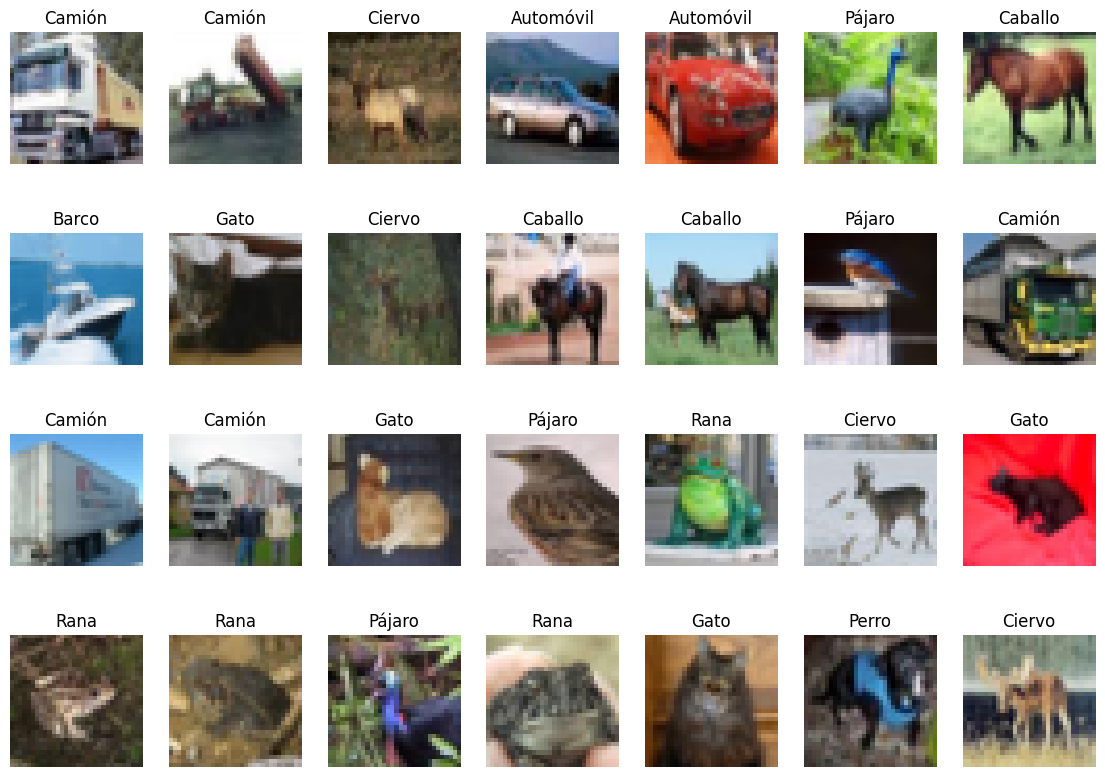

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure (figsize=(14,10))
for n in range(1,29):
    fig.add_subplot(4, 7, n)
    img = trainX[n]
    plt.imshow(img)
    plt.title(labelNames[trainY[n][0]])
    plt.axis('off')

## -Acondicionando el conjunto de datos

In [7]:
# PREPROCESADO DE LOS DATOS
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

print(trainY.shape)
print(testY.shape)

(50000, 1)
(10000, 1)
(50000, 10)
(10000, 10)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


## -Creando un contenedor DataGenerator para el aumento automático de muestras

In [8]:
# LO QUE ESTÁ COMENTADO SE PUEDE DESCOMENTAR EN UN NUEVO MODELO A VER SI CAMBIA ALGO.

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15, # grados de rotación aleatoria
    width_shift_range=0.1, # fracción del total (1) para mover la imagen #Son desplazamientos aleatorios horizontales por la imagen
    height_shift_range=0.1, # fracción del total (1) para mover la imagen # Son desplazamientos aleatorios verticales por la imagen
    horizontal_flip=True, # girar las imágenes horizontalmente (eje vertical)
   # shear_range=0, # deslizamiento
   # zoom_range=0.1, # rango de zoom
   # fill_mode='nearest', # como rellenar posibles nuevos píxeles
   # channel_shift_range=0.2, # cambios aleatorios en los canales de la imagen
    validation_split=0.2
)

## -Inspeccionando las muestras generadas sitéticamente

In [10]:
#Esto lo que nos hace es una serie de transformaciones a una imagen de partida.

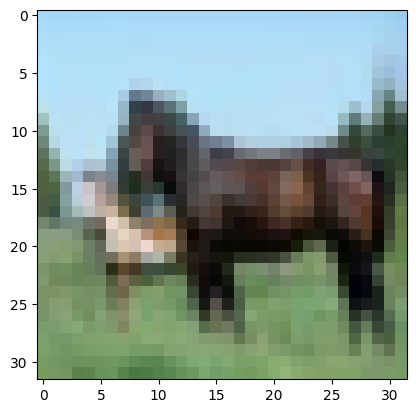

Label = Caballo


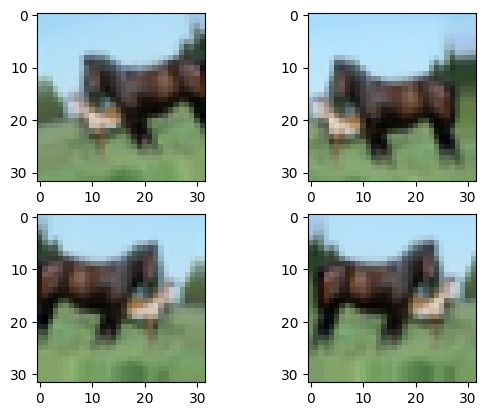

In [11]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

sample = 12  #Esta es la Imagen 12 pero podríamos haber elegido cualquier otra.
plt.imshow(image.array_to_img(trainX[sample]))
plt.show()
print('Label = {}'.format(labelNames[trainY[sample].argmax(axis=0)]))

fig, axes = plt.subplots(2, 2)
i = 0
for batch in datagen.flow(trainX[sample].reshape((1, 32, 32, 3)), batch_size=1):
    axes[i//2, i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break

plt.show()

## -Creando la topología de red neuronal y entrenándola: CNN

In [12]:
# Import the necessary packages
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Definimos entradas
inputs = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3])) # shape=(32,32,3) ####Esto se adapta perfectamente a la dimensionalidad.

#######Estamos usando la API funcional, no es la API Secuencial de antes.

# BASE MODEL

# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

# Tercer set de capas CONV => RELU => CONV => RELU => POOL
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x3 = BatchNormalization()(x3)
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x3)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2))(x3)
x3 = Dropout(0.25)(x3)


#TOP MODEL

#Primer (y único) set de capas FC => RELU
xfc = Flatten()(x3)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)


#Clasificador softmax ##Esta es la capa de salida
predictions = Dense(10, activation="softmax")(xfc)

# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs
model_aug = Model(inputs=inputs, outputs=predictions)

In [14]:
# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model_aug.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

###### HASTA AQUÍ ES IGUAL QUE ANTES

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")

#Aquí almacenamos nuestras imagenes transformadas/aumentadas
train_generator = datagen.flow(            #.flow carga las imagenes reales de entrenamiento
  trainX,
  trainY,
  batch_size=128,
  subset="training") # creamos subset de entrenamiento

#Aquí pasamos lo que hemos almacenado en train_generator
validation_generator = datagen.flow(            
  trainX,
  trainY,
  batch_size=128,
  subset="validation") # creamos subset de validación

data_aug_factor = 2 # nº de imágenes sintéticas a generar por cada real

H_aug = model_aug.fit(
            train_generator,
            steps_per_epoch = train_generator.n*data_aug_factor//128, # Esto no se modifica.
            validation_data = validation_generator,
            validation_steps = validation_generator.n*data_aug_factor//128,
            #workers = data_aug_factor, # número máximo de procesos en paralelo para el preprocesamiento de datos #No puedo ejecutar esta linea porque da error a causa de las versiones de Tensorflow mas nuevas que no necesitan Workers
            epochs = 50)


# Montamos la unidad de Drive
#drive.mount('/content/drive')
# Almacenamos el modelo empleando la función mdoel.save de Keras
#model_cnn.save(BASE_FOLDER+"deepCNN_CIFAR10.h5")

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model_aug.predict(testX, batch_size=128)


#Sacamos el report para test
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas One-Hot-Encoding

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/50


c:\Users\Herre\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/625 ━━━━━━━━━━━━━━━━━━━━ 57s 185ms/step - accuracy: 0.3353 - loss: 2.1577

c:\Users\Herre\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 100ms/step - accuracy: 0.3693 - loss: 1.9822 - val_accuracy: 0.1478 - val_loss: 4.0432
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 106ms/step - accuracy: 0.5377 - loss: 1.3354 - val_accuracy: 0.5306 - val_loss: 1.3933
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 98ms/step - accuracy: 0.6159 - loss: 1.1018 - val_accuracy: 0.5918 - val_loss: 1.2010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.6607 - loss: 0.9652 - val_accuracy: 0.6973 - val_loss: 0.8739
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 102ms/step - accuracy: 0.6957 - loss: 0.8586 - val_accuracy: 0.6896 - val_loss: 0.9228
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.7202 - loss: 0.7969 - val_accuracy: 0.7060 - val_loss: 0.8447
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.7362 - loss: 0.7504 - val_accuracy: 0.6675 - val_loss: 0.9660
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.7534 - loss: 0.7087 - val_acc

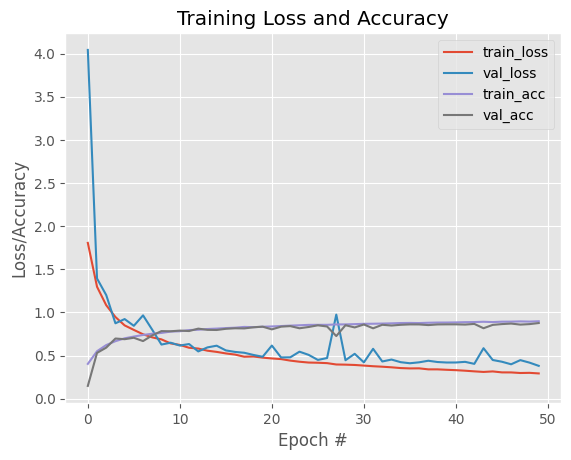

In [16]:
# Mostramos gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H_aug.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H_aug.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H_aug.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H_aug.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()